In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [10]:
x_train = np.load("data/x_trainBIG.npy")
y_train = np.load("data/y_trainBIG.npy")
x_test = np.load("data/x_test.npy")
y_test = np.load("data/y_test.npy")

In [4]:
input_shape = x_train.shape[1:]
input_shape

(292, 608, 3)

In [7]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax'),
])
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 532608)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               68173952  
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 68,174,597
Trainable params: 68,174,597
Non-trainable params: 0
_________________________________________________________________


In [8]:
model1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist1 = model1.fit(
    x_train, 
    y_train,
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
44/44 [==============================] - 9s 207ms/step - loss: 61861.4492 - accuracy: 0.3242 - val_loss: 18657.3691 - val_accuracy: 0.3550
Epoch 2/30
44/44 [==============================] - 9s 202ms/step - loss: 1582.0070 - accuracy: 0.6136 - val_loss: 11572.9961 - val_accuracy: 0.4550
Epoch 3/30
44/44 [==============================] - 9s 203ms/step - loss: 579.7972 - accuracy: 0.7000 - val_loss: 6584.1958 - val_accuracy: 0.4800
Epoch 4/30
44/44 [==============================] - 9s 201ms/step - loss: 390.4361 - accuracy: 0.7212 - val_loss: 2965.1086 - val_accuracy: 0.5000
Epoch 5/30
44/44 [==============================] - 9s 202ms/step - loss: 184.0958 - accuracy: 0.8076 - val_loss: 8.8675 - val_accuracy: 0.4800
Epoch 6/30
44/44 [==============================] - 9s 200ms/step - loss: 7.5143 - accuracy: 0.2939 - val_loss: 1.6125 - val_accuracy: 0.2000
Epoch 7/30
44/44 [==============================] - 9s 200ms/step - loss: 1.5895 - accuracy: 0.2485 - val_loss: 1.6169 - 

In [18]:
model1.save("model1.h5")

In [9]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss ='SparseCategoricalCrossentropy', 
    metrics=['accuracy'])

In [10]:
hist2 = model2.fit(
    x_train, 
    y_train,    
    epochs=30,
    batch_size=30,
    validation_data=(x_train, y_test))

Epoch 1/30
44/44 [==============================] - 115s 3s/step - loss: 20434.0098 - accuracy: 0.5561 - val_loss: 3047.8452 - val_accuracy: 0.5050
Epoch 2/30
44/44 [==============================] - 115s 3s/step - loss: 69.2037 - accuracy: 0.9402 - val_loss: 561.5401 - val_accuracy: 0.7100
Epoch 3/30
44/44 [==============================] - 114s 3s/step - loss: 26.1422 - accuracy: 0.9621 - val_loss: 237.1546 - val_accuracy: 0.6800
Epoch 4/30
44/44 [==============================] - 114s 3s/step - loss: 26.4775 - accuracy: 0.9636 - val_loss: 15.1547 - val_accuracy: 0.7000
Epoch 5/30
44/44 [==============================] - 114s 3s/step - loss: 21.0313 - accuracy: 0.9682 - val_loss: 389.6857 - val_accuracy: 0.6850
Epoch 6/30
44/44 [==============================] - 113s 3s/step - loss: 16.8765 - accuracy: 0.9644 - val_loss: 222.8044 - val_accuracy: 0.7300
Epoch 7/30
44/44 [==============================] - 113s 3s/step - loss: 14.8196 - accuracy: 0.9682 - val_loss: 196.5613 - val_accura

In [14]:
model2.save("model2")
with open('history2.json', 'w') as handle: # saving the history of the model
    json.dump(hist2.history, handle)

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Model used in facial expression recognition

In [15]:
# model Alizadeh and Fazel
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

model_fe = Sequential()

model_fe.add(Conv2D(64, 3, padding='same', input_shape=input_shape))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv2D(128, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv2D(256, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv2D(512, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Flatten())

model_fe.add(Dense(512))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(Dropout(0.25))

model_fe.add(Dense(256))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(Dropout(0.25))

model_fe.add(Dense(5))
model_fe.add(Activation('softmax'))

In [16]:
# y_train_oh = tf.keras.utils.to_categorical(y_train, 5)
# y_test_oh = tf.keras.utils.to_categorical(y_test, 5)

model_fe.compile(
    loss='SparseCategoricalCrossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

hist_fe = model_fe.fit(
    x_train, 
    y_train,
    epochs=50,
    batch_size=30,
    validation_data=(x_test, y_test)
    )

Epoch 1/50
44/44 [==============================] - 430s 10s/step - loss: 0.3278 - accuracy: 0.8902 - val_loss: 37.7674 - val_accuracy: 0.2000
Epoch 2/50
44/44 [==============================] - 428s 10s/step - loss: 0.1853 - accuracy: 0.9485 - val_loss: 8.4676 - val_accuracy: 0.3100
Epoch 3/50
44/44 [==============================] - 429s 10s/step - loss: 0.1530 - accuracy: 0.9462 - val_loss: 2.7881 - val_accuracy: 0.4900
Epoch 4/50
44/44 [==============================] - 428s 10s/step - loss: 0.1157 - accuracy: 0.9644 - val_loss: 1.8259 - val_accuracy: 0.5150
Epoch 5/50
44/44 [==============================] - 428s 10s/step - loss: 0.1232 - accuracy: 0.9652 - val_loss: 1.7937 - val_accuracy: 0.5000
Epoch 6/50
44/44 [==============================] - 429s 10s/step - loss: 0.1022 - accuracy: 0.9659 - val_loss: 0.9606 - val_accuracy: 0.7300
Epoch 7/50
44/44 [==============================] - 428s 10s/step - loss: 0.0984 - accuracy: 0.9720 - val_loss: 0.3340 - val_accuracy: 0.9500
Epoch

In [17]:
model_fe.save("model_fe.h5")
with open('history_fe.json', 'w') as handle: # saving the history of the model
    json.dump(hist_fe.history, handle)

Transfer Learning

In [11]:
model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
model.trainable = False

# adding the top classification layer
model_tl = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=5, activation='softmax')
    ]
)
model_tl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 10, 19, 1280)     2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 243200)            0         
                                                                 
 dense_6 (Dense)             (None, 5)                 1216005   
                                                                 
Total params: 3,473,989
Trainable params: 1,216,005
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
model_tl.compile(optimizer="adam",
                 loss='SparseCategoricalCrossentropy',
                 metrics=['accuracy'])
hist_tl = model_tl.fit(
    x_train, 
    y_train, 
    epochs=30, 
    batch_size=30, 
    validation_data=(x_test, y_test))

Epoch 1/30
44/44 [==============================] - 61s 1s/step - loss: 6.8042 - accuracy: 0.7773 - val_loss: 4.9176 - val_accuracy: 0.6850
Epoch 2/30
44/44 [==============================] - 59s 1s/step - loss: 0.5520 - accuracy: 0.9644 - val_loss: 9.2517 - val_accuracy: 0.7350
Epoch 3/30
44/44 [==============================] - 59s 1s/step - loss: 0.4579 - accuracy: 0.9720 - val_loss: 18.2425 - val_accuracy: 0.5850
Epoch 4/30
44/44 [==============================] - 59s 1s/step - loss: 0.5941 - accuracy: 0.9576 - val_loss: 7.4803 - val_accuracy: 0.7450
Epoch 5/30
44/44 [==============================] - 59s 1s/step - loss: 0.3445 - accuracy: 0.9720 - val_loss: 19.6382 - val_accuracy: 0.7250
Epoch 6/30
44/44 [==============================] - 59s 1s/step - loss: 0.7388 - accuracy: 0.9674 - val_loss: 4.1557 - val_accuracy: 0.7450
Epoch 7/30
44/44 [==============================] - 59s 1s/step - loss: 0.4057 - accuracy: 0.9735 - val_loss: 7.1659 - val_accuracy: 0.7400
Epoch 8/30
44/44 [

In [13]:
model_tl.save("model_tl")
with open('history_tl.json', 'w') as handle: # saving the history of the model
    json.dump(hist_tl.history, handle)

INFO:tensorflow:Assets written to: model_tl\assets


INFO:tensorflow:Assets written to: model_tl\assets


### Visualizations

In [ ]:
hist_fe = json.load(open("history_fe.json", "r"))

In [ ]:
model_fe = tf.keras.models.load_model("saved_models/model_fe")

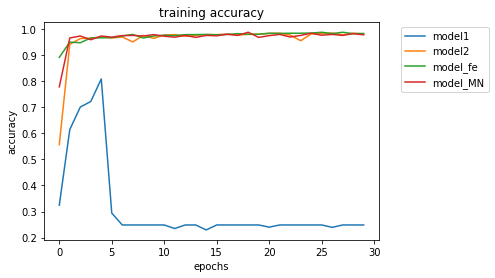

In [19]:
plt.plot(hist1.history["accuracy"], label="model1")
plt.plot(hist2.history["accuracy"], label="model2")
plt.plot(hist_fe.history["accuracy"][:30], label="model_fe")
plt.plot(hist_tl.history["accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("training accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

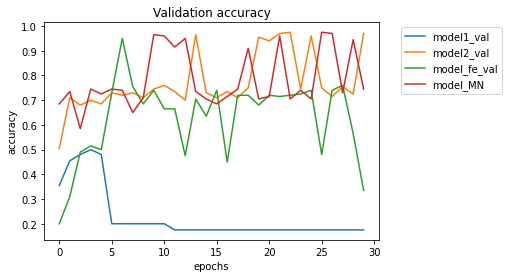

In [20]:
plt.plot(hist1.history["val_accuracy"], label="model1_val")
plt.plot(hist2.history["val_accuracy"], label="model2_val")
plt.plot(hist_fe.history["val_accuracy"][:30], label="model_fe_val")
plt.plot(hist_tl.history["val_accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

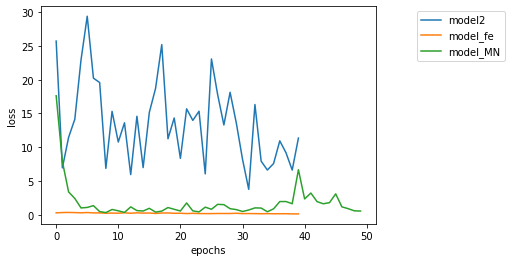

In [55]:
# plt.plot(hist1.history["loss"][10:], label="model1")
plt.plot(hist2.history["loss"][10:], label="model2")
plt.plot(hist_fe.history["loss"][10:], label="model_fe")
plt.plot(hist_tl.history["loss"],label="model_MN")

# plt.plot(hist1.history["val_loss"][10:], label="model1_val")
# plt.plot(hist2.history["val_loss"][10:], label="model2_val")
# plt.plot(hist_fe.history["val_loss"][10:], label="model_fe_val")
# plt.plot(hist_tl.history["val_loss"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

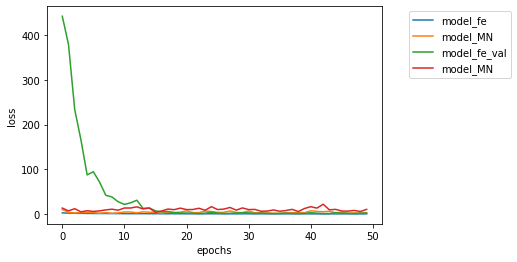

In [93]:
# plt.plot(hist1.history["loss"], label="model1")
# plt.plot(hist2.history["loss"], label="model2")
plt.plot(hist_fe.history["loss"], label="model_fe")
plt.plot(hist_tl.history["loss"][:50],label="model_MN")

# plt.plot(hist1.history["val_loss"], label="model1_val")
# plt.plot(hist2.history["val_loss"], label="model2_val")
plt.plot(hist_fe.history["val_loss"], label="model_fe_val")
plt.plot(hist_tl.history["val_loss"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Evaluate accuracy with test set

In [35]:
# loss1, acc1 = model1.evaluate(x_test, y_test)
loss2, acc2 = model2.evaluate(x_train, y_train)
# loss_fe, acc_fe = model_fe.evaluate(x_test, y_test)
loss_tl, acc_tl = model_tl.evaluate(x_train, y_train)

42/42 [==============================] - 52s 1s/step - loss: 0.3247 - accuracy: 0.9750


In [33]:
pred = model2.predict(x_train)
labels = tf.argmax(pred, axis=1)
cm = tf.math.confusion_matrix(labels, y_train)

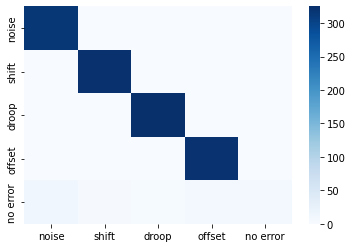

In [34]:
import seaborn as sns

l = ["noise", "shift", "droop", "offset", "no error"]
ax = sns.heatmap(cm, cmap="Blues")
ax.xaxis.set_ticklabels(l)
ax.yaxis.set_ticklabels(l)
plt.show()